## FHNW Machine Learning - FS2024

In [1]:
# DO NOT EDIT THIS CELL
# ADD IMOPRTS IN ASSIGNMENT CELLS

# Notebook configs
%load_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
from IPython.display import HTML

InteractiveShell.ast_node_interactivity = "all"

# Bewertete Übung 02

**Ausgabe:** Montag, 15. April 2024

**Abgabe:** Montag, 6. Mai 2024, 23:59 Uhr


## Vorgaben zu Umsetzung und Abgabe

- Die Algorithmen müssen auf der Basis von Array Operationen selber implementiert werden.
- Der Code muss lauffähig sein bei Ausführung im Docker-Container zum Repo oder auf JHub. 
- Es darf kein Code ausgelagert werden, i.e. sämtlicher Code muss sich im Notebook befinden.
- Sämtliche Plots sind komplett beschriftet (Achsen, Labels, Überschrift, Colorbar, ..), so dass der Plot ohne den Code zu konsultieren, verstanden werden kann.
- Als **Abgabe** zählt der letzte Commit vor Abgabetermin in in Ihrem Fork des Repos.  

- **Bitte löschen, kopieren, duplizieren, splitten und verschieben Sie die vorhandenen Zellen nicht**. Dies führt zu Problemen bei der Korrektur. Sie dürfen aber beliebig viele weitere Zellen hinzufügen (nur via **insert new cell**).
- Laufzeit vom Notebook: Das Notebook sollte in weniger als 30 Minuten ausgeführt werden können.

Für die Erarbeitung der Lösung darf unter Studierenden zusammengearbeitet werden. Die Zusammenarbeit ist dabei aber auf konzeptionelle und algorithmische Fragen und Verständnisaspekte beschränkt.  

**Es darf kein Code oder Text von anderen oder vom Internet kopiert werden.**


### Module

Neben den Python-Basismodulen dürfen Sie die folgenden Module immer benutzen: `numpy`, `pandas`, `matplotlib`, `seaborn`,  `tqdm` (für Progress-Bars).

Sie dürfen auch generell [sklearn.preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing), [sklearn.model_selection](https://scikit-learn.org/stable/model_selection.html), [sklearn.pipeline](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.pipeline) und [sklearn.compose](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.compose) benutzen.

Zusätzliche Module dürfen Sie nur verwenden wenn ausdrücklich erwähnt oder bereits vorgegeben in der Code-Cell.

## Bewertung

Bewertet wird:

- Vollständigkeit (Code, Text)
- Korrektheit (Code, Text)
- Implementation (z.B. Vektorisierung der Operationen, Scikit-Learn API, Visualisierungen, Lesbarkeit Code/Output)

## Einleitung

Mika arbeitet für eine Hotelkette welche mit schlecht ausgelasteten Hotels zu kämpfen hat. In einer Datenanalyse hat man festgestellt, dass ein wichtiger Grund für die schlechte Auslastung, stornierte Buchungen sind. Diese Buchungen werden zum Teil auch kurzfristig storniert und können dann oft nicht mehr mit neuen Gästen kompensiert werden. Das Management des Hotels möchte nun herausfinden, ob es möglich ist vorherzusagen, welche Buchungen storniert werden. Mika hat nun die Aufgabe bekommen ein Modell zu erstellen, um für jede Buchung eine Vorhersage zu erstellen. Mika hat von zwei Hotels Datensätze gesammelt und diese aufbereitet. Mika hat von Alex erfahren, dass Sie ein Experte in Sachen Machine Learning sind und bittet Sie um Hilfe.

Es ist das Ziel aus Buchungsdaten (siehe Tabelle unten) vorherzusagen, ob diese storniert wird `IstStorniert`.


| Spalt                           | Beschreibung |
|---------------------------------|----------------|
| DurchschnittlicherTagespreis    | Durchschnittlicher Preis pro Nacht |
| Erwachsene                      | Anzahl der Erwachsenen |
| Ankunftsmonat                   | Monat der Ankunft |
| Babys                           | Anzahl der Babys |
| Kinder                          | Anzahl der Kinder |
| Anzahlungstyp                   | Typ der Anzahlung |
| IstStorniert                    | Ob die Buchung storniert wurde (0=Nein, 1=Ja) |
| IstWiederholungsgast            | Ob der Gast ein Wiederholungsgast ist |
| Vorlaufzeit                     | Tage zwischen Buchung und Ankunft |
| Marktsegment                    | Marktsegment der Buchung |
| Mahlzeittyp                     | Gebuchter Mahlzeitentyp |
| VorherigeNichtStornierteBuchungen | Anzahl vorheriger nicht stornierter Buchungen |
| VorherigeStornierungen          | Anzahl vorheriger Stornierungen |
| BenötigteParkplätze             | Anzahl benötigter Parkplätze |
| ReservierterZimmertyp           | Typ des reservierten Zimmers |
| AufenthalteAnWochenendnächten   | Anzahl der Übernachtungen am Wochenende |
| AufenthalteAnWochennächten      | Anzahl der Übernachtungen unter der Woche |
| GesamtzahlDerSonderwünsche      | Anzahl der Sonderwünsche |
| Hotel                           | ID vom Hotel für welches die Buchung gemacht worden ist



## Aufgabe 1 (5 Punkte)

In dieser Aufgabe ist es das Ziel den Datensatz `./hotel_train.csv` einzulesen, kennenzulernen und erste Erkenntnisse zu diskutieren.


Charakterisieren Sie den Datensatz indem Sie folgende Aufgaben erledigten, bzw. Fragen beantworten. Nur die Beantwortung der folgenden Fragen wird bewertet:

1. Wie beeinflusst die Anzahl und die Kategorien der Personen, die eine Buchung umfasst, die Zielvariable `IstStorniert`?
2. Ist der Preis pro Nacht Abhängig von den Anzahl Personen?
3. Schauen Sie sich die Wiederholungsgäste an: Wieviele gibt es und wie häufig stornieren diese im Vergleich zu den anderen Gästen?
4. Von wievielen Hotels stammen die Buchungen? Was könnte das für einen Einfluss haben auf die Modellierung?
5. Unser Ziel ist es den Buchungsstatus `IstStorniert` vorherzusagen unter Verwendung der anderen Variablen.  Was lässt sich über dieses Vorhaben sagen? Diskutieren Sie Ihre Einsichten.

Beantworten Sie alle Fragen in der folgenden Text-Zelle. Referenzieren Sie die Fragen anhand der Fragennummer. Sie können auf Grafiken oder Tabellen referenzieren, die Sie unten in der Code-Zelle erstellen können.


1. **Wie beeinflusst die Anzahl und die Kategorien der Personen, die eine Buchung umfasst, die Zielvariable `IstStorniert`?** \
Anhand der ersten Grafik und den Kennzahlen ist zu erkennen, dass die meisten Buchungen von zwei erwachsene Personen ohne Kinder/Babys stammen - gefolgt von einzelnen erwachsenen Gästen (67.61% resp. 19.52% aller Buchungen). Daraus lässt sich schliessen, dass es sich beim Hotel nicht um ein Familien-Hotel handelt, weshalb die Kategorin "Babys" wie auch "Kinder" insgesamt eine untergeordnete Rolle spielen.
In der zweiten Grafik ist die Stornierungsrate pro Kategorie und Anzahl Personen ersichtlich. Die beiden wichtigsten Balken sind hierbei eine resp. zwei erwachsene Personen (34.75% resp. 45.01% Stornierungsrate).
Da lediglich eine bis zwei von allen möglichen Kombinationen aus Anzahl Personen und Kategorien relevant sind (diese machen ca. 86%) und diese beiden ebenfalls eine ähnliche Stornierungsrate aufweisen, kann keine nennenswerte Korrelation zwischen diesen und der Zielvariable `IstStorniert` festgestellt werden.

2. **Ist der Preis pro Nacht Abhängig von den Anzahl Personen?** \
Man kann einen gewissen Zusammenhang zwischen dem Preis pro Nacht und der Anzahl der Personen erkennen. Es gibt einen einzigen Ausreisser, welcher für zwei Personen einen sehr hohen Preis pro Nacht bezahlt hat. Ansonsten steigt der Preis pro Nacht mit der Anzahl der Personen. Die Streuung der Preise pro Anzahl Personen ist jedoch sehr gross, weshalb sich die Korrelation zwischen Anzahl Personen und Preis pro Nacht lediglich auf 0.43 beläuft. 

3. **Schauen Sie sich die Wiederholungsgäste an: Wieviele gibt es und wie häufig stornieren diese im Vergleich zu den anderen Gästen?** \
Die Stornierungsrate für Wiederholungsgäste liegt bei 22.19% und für Neukunden bei 42.25%. Es gibt 1041 Wiederholungsgäste und 38623 Neukunden. Somit stornieren Wiederholungsgäste weniger als Neukunden. Da die meisten Kunden aber Neukunden sind und nur wenige das Hotel mehrmals besuchen, ist die Stornierungsrate der Wiederholungsgäste weniger aussagekräftig.\
Um diese Werte interpretieren zu können, müsste man nun mehr Informationen über das Hotel haben. Gewisse Hotels besucht man selten mehrfach (z. B. auf Städtereisen, dies würde auch zu den Anzahl Personen und deren Kategorie passen aus Frage 1 passen), während andere Hotels regelmässig besucht werden (z. B. Ferienhotels in den Bergen oder am Meer).

4. **Von wievielen Hotels stammen die Buchungen? Was könnte das für einen Einfluss haben auf die Modellierung?** \
Die Buchungen stammen alle vom selben Hotel, somit nützt diese Variable nichts. Das Modell wird also nur auf Basis von Buchungen eines Hotels erstellt, was die Verwendung des Modells für andere Hotels einschränkt.

5. **Unser Ziel ist es den Buchungsstatus `IstStorniert` vorherzusagen unter Verwendung der anderen Variablen. Was lässt sich über dieses Vorhaben sagen? Diskutieren Sie Ihre Einsichten.** \
Es gibt wenige Variablen, welche eine wirklich gute Korrelation mit der Zielvariable aufweisen. So sehen die `Vorlaufzeit`, die `GesamtzahlDerSonderwünsche` oder auch das `Marktsegment_Gruppe` vielversprechend aus. Die höchste Korrelation erzielt die Variable `Anzahlungstyp`, da hier aber die Verteilung der Kategorien sehr ungleich ist, ist diese Korrelation nicht aussagekräftig.\
Ich vermute, dass das Modell in vielen Fällen eine gute Vorhersage treffen kann. Es wird aufgrund der Input-Daten aber auch viele Fälle geben, wo die Vorhersage nicht passen wird.

Erstellen Sie bei Bedarf Grafiken / Outputs um Fragen zu beantworten in der folgenden Zelle.

1. Frage: Wie beeinflusst die Anzahl und die Kategorien der Personen, die eine Buchung umfasst, die Zielvariable `IstStorniert`?


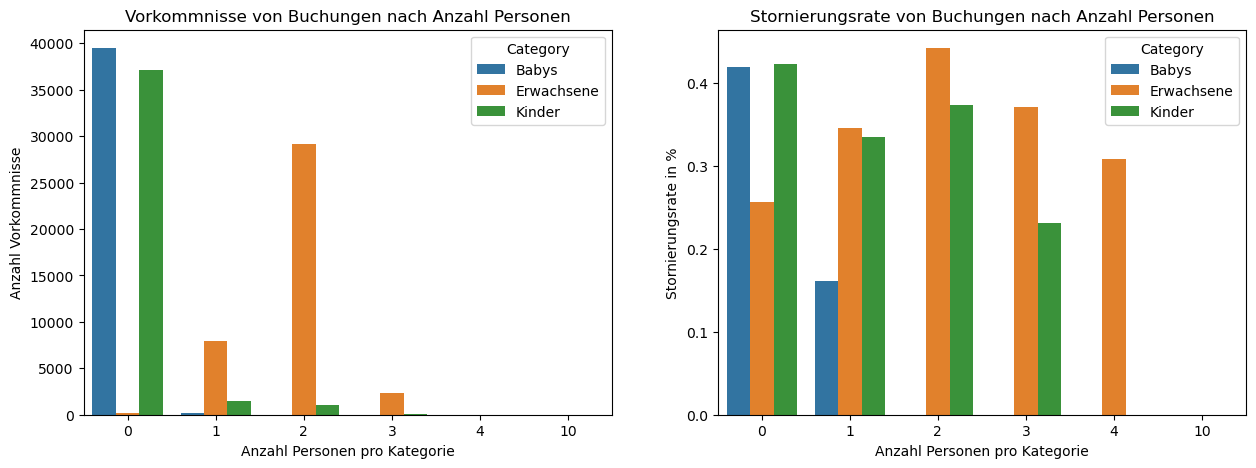

Anzahl Buchungen mit 1 Erwachsenen und Kindern und oder Babies: 161 / 39665 (0.41%)
Anzahl Buchungen mit 1 Erwachsenen und keinen Kinder/Babys: 7743 / 39665 (19.52%)
Anzahl Buchungen mit 2 Erwachsenen und Kindern und oder Babies: 2339 / 39665 (5.90%)
Anzahl Buchungen mit 2 Erwachsenen und keinen Kinder/Babys: 26819 / 39665 (67.61%)
Anzahl Buchungen mit 3 Erwachsenen und Kindern und oder Babies: 69 / 39665 (0.17%)
Anzahl Buchungen mit 3 Erwachsenen und keinen Kinder/Babys: 2322 / 39665 (5.85%)
Stornierungsrate für Buchungen mit 1 Erwachsenen und keinen Kinder/Babys: 34.75%
Stornierungsrate für Buchungen mit 2 Erwachsenen und keinen Kinder/Babys: 45.01%



2. Frage: Ist der Preis pro Nacht Abhängig von den Anzahl Personen?


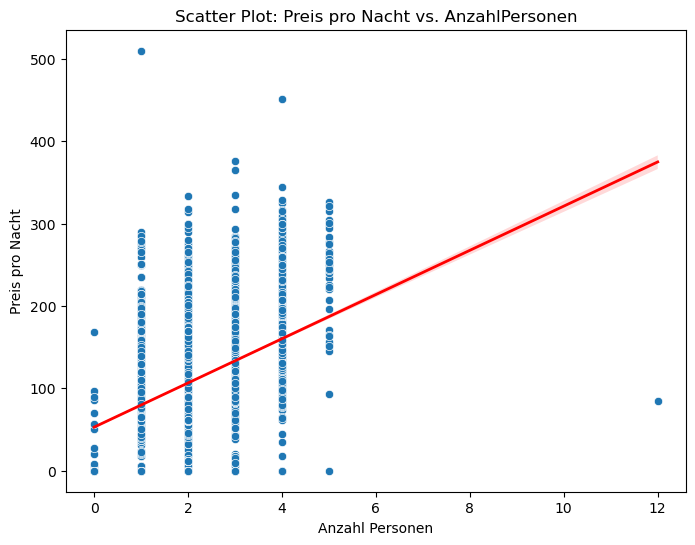

Korrelation zwischen AnzahlPersonen und DurchschnittlicherTagespreis: 0.432926622539677



3. Frage: Schauen Sie sich die Wiederholungsgäste an: Wieviele gibt es und wie häufig stornieren diese im Vergleich zu den anderen Gästen?


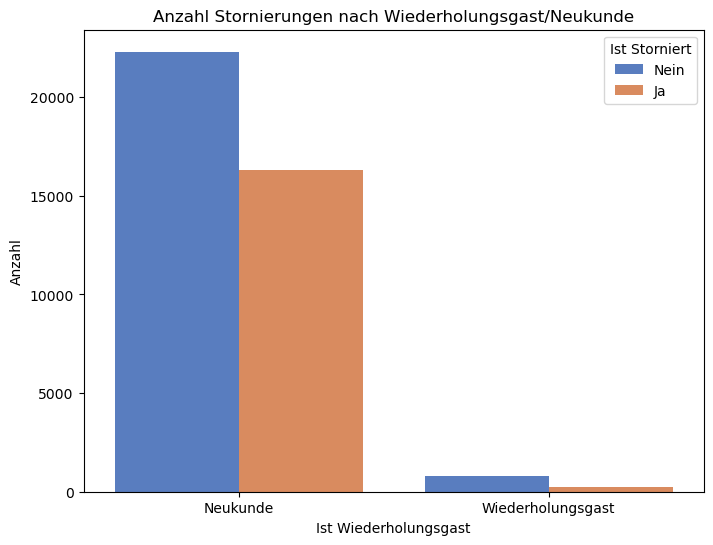

Anzahl der Wiederholungsgäste: 1041
Anzahl der Neukunde: 38623
Stornierungsrate für Wiederholungsgäste: 22.19%
Stornierungsrate für Neukunde: 42.25%



4. Frage: Von wievielen Hotels stammen die Buchungen? Was könnte das für einen Einfluss haben auf die Modellierung?
Anzahl der verschiedenen Hotels: 1



5. Frage: Unser Ziel ist es den Buchungsstatus `IstStorniert` vorherzusagen unter Verwendung der anderen Variablen. Was lässt sich über dieses Vorhaben sagen? Diskutieren Sie Ihre Einsichten.


,IstStorniert
Anzahlungstyp_Nicht erstattbar,0.520490
Vorlaufzeit,0.306287
Marktsegment_Gruppen,0.261897
VorherigeStornierungen,0.166617
Erwachsene,0.051802
AufenthalteAnWochennächten,0.051726
Mahlzeittyp_Übernachtung mit Frühstück,0.043990
Mahlzeittyp_Vollpension,0.024219
AnzahlPersonen,0.019023
Ankunftsmonat_Mai,0.016322


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_bookings = pd.read_csv('./hotel_train.csv')
df_bookings['AnzahlPersonen'] = df_bookings['Erwachsene'] + df_bookings['Kinder'] + df_bookings['Babys']



print("1. Frage: Wie beeinflusst die Anzahl und die Kategorien der Personen, die eine Buchung umfasst, die Zielvariable `IstStorniert`?")

df_bookings_melted = pd.melt(df_bookings, id_vars=['IstStorniert'], value_vars=['Erwachsene', 'Babys', 'Kinder'], var_name='Category', value_name='Count')

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

df_bookings_grouped = df_bookings_melted.groupby(['Count', 'Category'])['IstStorniert'].count().reset_index()
_ = sns.barplot(data=df_bookings_grouped, x='Count', y='IstStorniert', hue='Category', ax=ax[0])
_ = ax[0].set_title('Vorkommnisse von Buchungen nach Anzahl Personen')
_ = ax[0].set_xlabel('Anzahl Personen pro Kategorie')
_ = ax[0].set_ylabel('Anzahl Vorkommnisse')

df_bookings_cancellationrate = df_bookings_melted.groupby(['Count', 'Category'])['IstStorniert'].mean().reset_index().rename(columns={'IstStorniert': 'CancellationRate'})
_ = sns.barplot(data=df_bookings_cancellationrate, x='Count', y='CancellationRate', hue='Category', ax=ax[1])
_ = ax[1].set_title('Stornierungsrate von Buchungen nach Anzahl Personen')
_ = ax[1].set_xlabel('Anzahl Personen pro Kategorie')
_ = ax[1].set_ylabel('Stornierungsrate in %')

plt.show()

bookings_with_1_adult_with_children = df_bookings[(df_bookings['Erwachsene'] == 1) & ((df_bookings['Kinder'] > 0) | (df_bookings['Babys'] > 0))].shape[0]
print(f"Anzahl Buchungen mit 1 Erwachsenen und Kindern und oder Babies: {bookings_with_1_adult_with_children} / {len(df_bookings)} ({bookings_with_1_adult_with_children / len(df_bookings) * 100:.2f}%)")
bookings_with_1_adult_no_children = df_bookings[(df_bookings['Erwachsene'] == 1) & (df_bookings['Kinder'] == 0) & (df_bookings['Babys'] == 0)].shape[0]
print(f"Anzahl Buchungen mit 1 Erwachsenen und keinen Kinder/Babys: {bookings_with_1_adult_no_children} / {len(df_bookings)} ({bookings_with_1_adult_no_children / len(df_bookings) * 100:.2f}%)")
bookings_with_2_adults_with_children = df_bookings[(df_bookings['Erwachsene'] == 2) & ((df_bookings['Kinder'] > 0) | (df_bookings['Babys'] > 0))].shape[0]
print(f"Anzahl Buchungen mit 2 Erwachsenen und Kindern und oder Babies: {bookings_with_2_adults_with_children} / {len(df_bookings)} ({bookings_with_2_adults_with_children / len(df_bookings) * 100:.2f}%)")
bookings_with_2_adults_no_children = df_bookings[(df_bookings['Erwachsene'] == 2) & (df_bookings['Kinder'] == 0) & (df_bookings['Babys'] == 0)].shape[0]
print(f"Anzahl Buchungen mit 2 Erwachsenen und keinen Kinder/Babys: {bookings_with_2_adults_no_children} / {len(df_bookings)} ({bookings_with_2_adults_no_children / len(df_bookings) * 100:.2f}%)")
bookings_with_3_adults_with_children = df_bookings[(df_bookings['Erwachsene'] == 3) & ((df_bookings['Kinder'] > 0) | (df_bookings['Babys'] > 0))].shape[0]
print(f"Anzahl Buchungen mit 3 Erwachsenen und Kindern und oder Babies: {bookings_with_3_adults_with_children} / {len(df_bookings)} ({bookings_with_3_adults_with_children / len(df_bookings) * 100:.2f}%)")
bookings_with_3_adults_no_children = df_bookings[(df_bookings['Erwachsene'] == 3) & (df_bookings['Kinder'] == 0) & (df_bookings['Babys'] == 0)].shape[0]
print(f"Anzahl Buchungen mit 3 Erwachsenen und keinen Kinder/Babys: {bookings_with_3_adults_no_children} / {len(df_bookings)} ({bookings_with_3_adults_no_children / len(df_bookings) * 100:.2f}%)")
cancellationrate_1_adult_no_children = df_bookings[(df_bookings['Erwachsene'] == 1) & (df_bookings['Kinder'] == 0) & (df_bookings['Babys'] == 0)]['IstStorniert'].mean() * 100
print(f"Stornierungsrate für Buchungen mit 1 Erwachsenen und keinen Kinder/Babys: {cancellationrate_1_adult_no_children:.2f}%")
cancellationrate_2_adults_no_children = df_bookings[(df_bookings['Erwachsene'] == 2) & (df_bookings['Kinder'] == 0) & (df_bookings['Babys'] == 0)]['IstStorniert'].mean() * 100
print(f"Stornierungsrate für Buchungen mit 2 Erwachsenen und keinen Kinder/Babys: {cancellationrate_2_adults_no_children:.2f}%")
print("\n\n")



print("2. Frage: Ist der Preis pro Nacht Abhängig von den Anzahl Personen?")

# Ausreisser entfernen (1 Eintrag hat einen Preis von 5400, sonst alle klar unter 1000)
df_bookings = df_bookings[df_bookings['DurchschnittlicherTagespreis'] < 1000]

_ = plt.figure(figsize=(8, 6))

_ = sns.scatterplot(data=df_bookings, x='AnzahlPersonen', y='DurchschnittlicherTagespreis')
_ = sns.regplot(data=df_bookings, x='AnzahlPersonen', y='DurchschnittlicherTagespreis', scatter=False, line_kws={'color': 'red', 'lw': 2})
_ = plt.title('Scatter Plot: Preis pro Nacht vs. AnzahlPersonen')
_ = plt.xlabel('Anzahl Personen')
_ = plt.ylabel('Preis pro Nacht')

plt.show()

correlation = df_bookings['AnzahlPersonen'].corr(df_bookings['DurchschnittlicherTagespreis'])
print("Korrelation zwischen AnzahlPersonen und DurchschnittlicherTagespreis:", correlation)
print("\n\n")



print("3. Frage: Schauen Sie sich die Wiederholungsgäste an: Wieviele gibt es und wie häufig stornieren diese im Vergleich zu den anderen Gästen?")

# Bar chart to visualize the proportion of cancellations among repeat and non-repeat guests
_ = plt.figure(figsize=(8, 6))

_ = sns.countplot(x='IstWiederholungsgast', hue='IstStorniert', data=df_bookings, palette='muted')
_ = plt.title('Anzahl Stornierungen nach Wiederholungsgast/Neukunde')
_ = plt.xlabel('Ist Wiederholungsgast')
_ = plt.xticks(ticks=[0, 1], labels=['Neukunde', 'Wiederholungsgast'])
_ = plt.legend(title='Ist Storniert', labels=['Nein', 'Ja'])
_ = plt.ylabel('Anzahl')

plt.show()

num_repeat_guests = df_bookings['IstWiederholungsgast'].sum()
num_non_repeat_guests = len(df_bookings) - num_repeat_guests
print(f"Anzahl der Wiederholungsgäste: {num_repeat_guests}")
print(f"Anzahl der Neukunde: {num_non_repeat_guests}")
repeat_cancellation_rate = df_bookings[df_bookings['IstWiederholungsgast'] == True]['IstStorniert'].mean() * 100
non_repeat_cancellation_rate = df_bookings[df_bookings['IstWiederholungsgast'] == False]['IstStorniert'].mean() * 100
print(f"Stornierungsrate für Wiederholungsgäste: {repeat_cancellation_rate:.2f}%")
print(f"Stornierungsrate für Neukunde: {non_repeat_cancellation_rate:.2f}%")
print("\n\n")



print("4. Frage: Von wievielen Hotels stammen die Buchungen? Was könnte das für einen Einfluss haben auf die Modellierung?")
num_hotels = df_bookings['Hotel'].nunique()
print(f"Anzahl der verschiedenen Hotels: {num_hotels}")
print("\n\n")



print("5. Frage: Unser Ziel ist es den Buchungsstatus `IstStorniert` vorherzusagen unter Verwendung der anderen Variablen. Was lässt sich über dieses Vorhaben sagen? Diskutieren Sie Ihre Einsichten.")

categorical_cols = ['Ankunftsmonat', 'Mahlzeittyp', 'Marktsegment', 'ReservierterZimmertyp', 'Anzahlungstyp', 'Hotel']
df_bookings_encoded = pd.get_dummies(df_bookings, columns=categorical_cols, drop_first=True)

correlation_table = df_bookings_encoded.corr()['IstStorniert'].sort_values(ascending=False)
correlation_table = correlation_table.drop('IstStorniert')

display(correlation_table.to_frame())

## Aufgabe 2 (23 Punkte)

Implementieren Sie einen _Random Forest Classifier_ basierend auf binären _Decision Trees_. Folgende Eigenschaften sollen vorhanden sein:

- Man soll ein binäres Klassifikationsproblem modellieren können ($y \in [0, 1]$).

- Konfigurierbarkeit bezüglich vorgegebenen Parametern wie Abbruchkriterien (Regularisierung).

- Korrektes bzw. sinnvolles Handling von verschiedenen Aspekten wie z.B. das Verhindern von leeren _Leaf Nodes_.

- Modulare Implementation: Erstellen / Ergänzen Sie die bereitgestellten Klassen. Sie können auch neue Methoden oder Argumente hinzufügen.

- Reproduzierbarkeit: Setzen Sie _random seeds_ wo nötig [siehe numpy](https://numpy.org/doc/stable/reference/random/index.html#random-quick-start).
- score() soll die Accuracy berechnen.

- Konsultieren Sie die Unterrichtsunterlagen, insbesondere für die Berechnung / das Finden der optimalen Splits.

- Die Implementation benötigt viele Loops und lässt sich nicht gut vektorisieren.

- Implementieren Sie das Modell gemäss sklearn-API.

Im folgenden einige Hinweise.


Die Vorgaben der Implementation sind sehr nahe an dem was in den Kursunterlagen gezeigt wird. Konsultieren Sie diese bei Bedarf.

### Decision Tree

Der Random Forest Classifier besteht aus einem _Ensemble_ von _Decision Tree Classifiern_. Die wichtigsten Funktionalitäten werden also in erstern Linie in der Klasse `BinaryDecisionTreeClassifier` implementiert sein. Die `BinaryRandomForestClassifier` Klasse managt das Training und das Ausführen von _Decision Trees_. 

Sie sollen einen `BinaryDecisionTreeClassifier` implementieren, der ausschliesslich binäre Splits auf nummerischen Variablen durchführt (das beinhaltet auch kategorielle Variablen die entsprechend _pre-processed_ worden sind). Ein solcher Decision Tree ist folgendermassen aufgebaut:

![Binärer Decision Tree](decision_tree.png)


### Random Forest

Ein Random Forest ist eine Kollektion von Decision Trees. Wobe jeder Decision Tree auf einem Trainingsdatensatz trainiert wird welcher mit _Resampling with Replacement_ erstellt worden ist.

Ein Random Forest funktioniert also im wesentliche so:

```
def fit(self, X, y):
    my_trees = list()
    for i in num_trees:
        X_sample, y_sample = sample_with_replacement(X, y)
        dt = DecisionTreeClassifier(x_sample, y_sample)
        my_trees.append(df.fit())
```

Zusätzlich werden bei jedem Node von einem Decision Tree nur ein zufälliges Sample von $l \le k$ Features berücksichtigt (statt alle $k$ Features zu berücksichtigen).

```
def fit(self, X, y):
    ...

    node_features = sample(l, all_features)

    best_feature = find_best_feature(node_features)
    
    ...
```

Um Predictions zu generieren werden alle Decision Trees konsultiert. Dabei wird die Klasse mit den meisten Stimmen (_Majority Vote_) als Vorhersage verwendet. Diese wird dann dem Datenpunkt zugeordnet.


### Building a Decision Tree

Ein Decision Tree wird rekursiv erstellt. Man erstellt als erstes den Root-Node und splittet diesen dann. Dabei wird die gleiche Logik rekursiv auf alle Child-Nodes angewendet, bis ein Stop-Kriterium erreicht worden ist. 

Man sucht für jeden Node den optimalen Split $S_{j,t}$. Dieser ist definiert durch welches Feature $j$ bei welchem Threshold $t$ der Datenatz im entsprechenden Node (binär) gesplittet wird.

#### Impurity

Man möchte, dass die Nodes von einem Decision Tree möglichst uniform sind (tiefe _Impurity_ haben), d.h. möglichst aus Datenpunkten von einer Klasse bestehen. Man minimiert dazu eine Impurity Metrik $Q$ . Wir verwenden dabei die (binäre) Entropie $H$.

#### Binäre Entropy

Die binäre Entropy von einem Node kann man folgendermassen berechnen:

\begin{align}
H(p) = -p \log_2(p) - (1 - p) \log_2(1 - p)
\end{align}

Dabei entsprich $p$ dem Anteil der positiven Klasse (Anteil Datenpunkte mit $y=1$)

Man kann leicht verifizieren, dass die binäre Entropie minimal wird wenn alle Datenpunkte von derselben Klasse sind (Achtung: $p\log_2(p)=0$ falls $p=0$.)



#### Information Gain

Ganz spezifisch möchte man _Information Gain_ $IG$ optimieren. Das ist die Differenz in der _Impurity_ $Q$ bevor und nach einem Split.

Formal wird der Information Gain für einen Split $S_{j,t}$ auf einem Datensatz $\mathbf{X}$ berechnet als:

\begin{equation*}
IG(\mathbf{X}, S_{j,t}) = Q(\mathbf{X}) - \Big( \frac{|\mathbf{X}_{l}|}{|\mathbf{X}|} Q(\mathbf{X}_l) + \frac{|D_{r}|}{|\mathbf{X}|}  Q(\mathbf{X}_r) \Big)
\end{equation*}

Dabei löst man an jedem Node das Optimisierungsproblem:

\begin{equation*}
\operatorname*{argmax}_{j,t} IG(\mathbf{X}, S_{j,t})
\end{equation*}

Die _Impurity_ wird also noch gewichtet mit den Anzahl Beobachtungen in den Child-Nodes. Bei binären Splits gibt es immer genau zwei Child-nodes, einen linken $\mathbf{X}_l$ und einen rechten $\mathbf{X}_r$.


#### Stopping Criteria

Man stoppt den rekursiven Algorithmus und erstellt ein _Leaf Node_ wenn eine der folgende Bedingungen eintreffen:

- Man hat eine vordefinierte maximale Tiefe erreicht (wobei der Root-Node auf Tiefe 0 ist).
- Alle Beobachtungen in $\mathbf{X}$ sind von derselben Klasse.
- $\operatorname*{argmax}_{j,t} IG(\mathbf{X}, S_{j,t})$ ist kleiner als ein festgelegter Threshold $\epsilon$
- Die Anzahl Beobachtungen in einem Node ist kleiner als ein festgelegter Threshold $m$
- Jeder Leaf-Node muss mindestens eine Beobachtung haben.


### Notation

- $n$: Anzahl Beobachtungen in einem Datensatz
- $k$: Anzahl Features in einem Datensatz
- $x^{(i)}_j$: Wert von Feature $j$ von Beobachtung $\mathbf{x}^{(i)}$
- $S_{j,t}$: Split-Kriterium. Dieses splittet entlang von Feature $j$ mit Threshold $t$. Beobachtungen mit $x_j<t$ gehen nach links, Beobachtungen mit $x_j \ge t$ nach rechts.
- $t$: Threshold für Feature-Split $\in (-\infty , +\infty)$
- $j$: Feature Index $\in [0, k-1]$
- $p$: Anteil positive Beobachtungen / Wahrscheinlichkeit dass eine Beobachtung positiv ($y=1$) ist $\in [0, 1]$.
- $y$: Label einer Beobachtung $\in \{0, 1\}$
- $\mathbf{X}$: Ein Datensatz. Alle Datenpunkte / Beobachtungen **von einem bestimmten** Node (ausser beim Root-Node sind es also nicht alle Datenpunkte).
- $IG(\mathbf{X}, S_{j,t})$: Information Gain von $\mathbf{X}$, falls man mit $S_{j,t}$ splittet.
- $Q(\mathbf{X})$: Die Impurity von einem Datensatz $\mathbf{X}$.
- $H(p)$ Die Entropie von $p$.
- $|\mathbf{X}|$ die Anzahl Beobachtungen in $\mathbf{X}$.
- $|\mathbf{X}_l|$ die Anzahl Beobachtungen im linken Child-Node nach einem Split von $\mathbf{X}$ (Beobachtungen mit $x_j<t$)
- $|\mathbf{X}_r|$ die Anzahl Beobachtungen im rechten Child-Node nach einem Split von $\mathbf{X}$ (Beobachtungen mit $x_j \ge t$)
- $\log_2(x)$: Logarithmus von $x$ zur Basis $2$.

### Aufbabe 2a

Vervollständigen Sie die folgenden Klassen und Funktionen.

In [3]:
from typing import Callable

import numpy as np


def binary_entropy(p: np.ndarray) -> np.ndarray:
    """Calculates the binary entropy over an array of positive proportions
    Args:
        p: (z,) 1-dimensional array with z elements, 
            each element denotes the proportion of positive samples
    Returns:
        (z,) the binary entropy of each proportion
    """
    p = np.clip(p, 1e-12, 1 - 1e-12)
    entropy = -p * np.log2(p) - (1 - p) * np.log2(1 - p)
    return entropy


class BinarySplitOptimizer:
    """Finds the best possible binary split of a dataset X, given a specific binary impurity function Q."""
    
    def __init__(self, impurity: Callable[np.ndarray, np.ndarray]):
        """
        Args:
            impurity: A function/callable that calculates the impurity given probabilities.
                takes as input a 1-D array of k probabilities (z, )
                returns z impurity values  (z, )
        """
        self.impurity = impurity
    
    def find_optimal_split(self, X: np.ndarray, y: np.ndarray) -> (int, float, float):
        """
        Finds the best split in X to minimize the impurity Q of the child-nodes.

        Args: 
            X (n, k): Input features, where n is the number of samples and k is the number of features.
            y (n, ): Target values.
        
        Returns:
            Tuple(j, t, impurity)
            
                j: The id of the feature 'j' to split, in  [0, k-1]
                t: the threshold 't' of the feature to split
                impurity: the impurity value
        """
        _, k = X.shape
        best_feature = None
        best_threshold = None
        best_impurity = np.inf

        for j in range(k):
            x = X[:, j]
            t, impurity = self.find_optimal_threshold(x, y)
            if impurity < best_impurity:
                best_feature = j
                best_threshold = t
                best_impurity = impurity

        return best_feature, best_threshold, best_impurity

    def find_optimal_threshold(self, x: np.ndarray, y: np.ndarray) -> (float, float):
        """Find the threshold 't' that minimizes the impurity Q for a given feature vector x.

        Args:
            x: (n, ) The value of a specific feature for each of n data points
            y: (n, ) The target / class label for each of n data points

        Returns:
            Tuple(t, impurity)
            Threshold 't' that minimizes the impurity.
        """
        sorted_indices = np.argsort(x)
        sorted_x = x[sorted_indices]
        sorted_y = y[sorted_indices]

        unique_values = np.unique(sorted_x)
        best_threshold = None
        best_impurity = np.inf

        for i in range(1, len(unique_values)):
            t = (unique_values[i - 1] + unique_values[i]) / 2
            left_mask = sorted_x <= t
            right_mask = ~left_mask

            p_left = np.mean(sorted_y[left_mask])
            p_right = np.mean(sorted_y[right_mask])

            impurity_left = self.impurity(np.array([p_left]))
            impurity_right = self.impurity(np.array([p_right]))

            total_impurity = (
                len(sorted_y[left_mask]) * impurity_left
                + len(sorted_y[right_mask]) * impurity_right
            ) / len(sorted_y)

            if total_impurity < best_impurity:
                best_threshold = t
                best_impurity = total_impurity

        return best_threshold, best_impurity


### Aufgabe 2b

Die folgende Zelle enthält verschiedene Tests die Ihre Implementation prüfen. Sorgen Sie dafür, dass die folgenden Tests erfolgreich sind. Stellen Sie sicher, dass die Input-Shapes der Methoden die Sie implementieren den Doc-Strings entsprechen.

**Achtung: Die Tests decken nicht alles ab. Sie können also nicht davon ausegehen, dass Ihre Implementation korrekt ist sobald die Tests erfolgreich sind.**

Es ist grundsätzlich ihre Aufgabe, die Implementation genau zu prüfen. Sie können dazu weitere Zellen mit eigenen Tests einfügen. Sie können jedoch die folgende Zelle nicht ändern. Diese wird nach Abgabe wieder überschrieben, sodass die von mir definierten Tests ausgeführt werden.

In [4]:
import numpy as np

def print_result(test_name, passed, expected, actual):
    status = "Passed" if passed else "Failed"
    print(f"{status} test: {test_name}")
    print(f"----> Expected: {expected}")
    print(f"----> Actual: {actual}")


def run_test_binary_entropy():
    probabilities = np.array([0.5, 1.0, 0.0])
    expected = np.array([1.0, 0.0, 0.0])
    actual = binary_entropy(probabilities)

    try:
        np.testing.assert_almost_equal(actual, expected, decimal=2)
        print_result("run_test_binary_entropy_calculator", True, expected, actual)
    except AssertionError:
        print_result("run_test_binary_entropy_calculator", False, expected, actual)

    
def run_test_impurity_optimizer():
    x = np.array([1, 2, 3, 4, 5])  # Feature values
    y = np.array([0, 0, 1, 1, 1])  # Binary classification labels
    expected_threshold = 2.5  # All thresholds between 2 and 3 are identical, we choose their mean
    expected_impurity = 0.0  # This is the expected value if binary entropy is the measure

    impurity_optimizer = BinarySplitOptimizer(binary_entropy)
    actual_threshold, actual_impurity = impurity_optimizer.find_optimal_threshold(x, y)

    try:
        np.testing.assert_almost_equal(expected_threshold, actual_threshold)
        np.testing.assert_almost_equal(expected_impurity, actual_impurity)
        print_result(
            "run_test_impurity_optimizer", True, 
            (expected_threshold, expected_impurity),
            (actual_threshold, actual_impurity))
    except AssertionError as e:
        print_result(
            "run_test_impurity_optimizer", False,
            (expected_threshold, expected_impurity),
            (actual_threshold, actual_impurity))


def run_test_impurity_splitter():
    
    X = np.array([
        [1, 2],
        [9, 3],
        [3, 10],
        [4, 18],
        [5, 20]
    ])
    
    y = np.array([0, 0, 1, 1, 1])  # Binary classification labels
    expected_feature_id = 1  # Assuming the second feature is the best for splitting
    expected_threshold = 6.5  # Assuming the best split is between 3 and 10 for the second feature
    expected_impurity = 0.0  # This is the expected value if binary entropy is the measure

    binary_split_optimizer = BinarySplitOptimizer(binary_entropy)
    actual_feature_id, actual_threshold, actual_impurity = binary_split_optimizer.find_optimal_split(X, y)

    try:
        np.testing.assert_almost_equal(expected_threshold, actual_threshold)
        np.testing.assert_almost_equal(expected_impurity , actual_impurity)
        np.testing.assert_equal(expected_feature_id, actual_feature_id)
        print_result(
            "run_test_impurity_splitter", True,
            (expected_feature_id, expected_threshold, expected_impurity),
            (actual_feature_id, actual_threshold, actual_impurity))
    except AssertionError as e:
        print_result(
            "run_test_impurity_splitter", False, 
            (expected_feature_id, expected_threshold, expected_impurity),
            (actual_feature_id, actual_threshold, actual_impurity))


for test in [run_test_binary_entropy, run_test_impurity_optimizer, run_test_impurity_splitter]:
    try:
        test()
    except Exception as e:
        print(f"Error during testing - test: {test} error: {e}")


Passed test: run_test_binary_entropy_calculator
----> Expected: [1. 0. 0.]
----> Actual: [1.00000000e+00 4.13049503e-11 4.13058003e-11]
Passed test: run_test_impurity_optimizer
----> Expected: (2.5, 0.0)
----> Actual: (2.5, array([4.13052903e-11]))
Passed test: run_test_impurity_splitter
----> Expected: (1, 6.5, 0.0)
----> Actual: (1, 6.5, array([4.13052903e-11]))


### Aufgabe 2c
Jetzt werden Sie den `BinaryDecisionTreeClassifier` implementieren.

In [5]:
from dataclasses import dataclass
from typing import Self, Callable, Union

import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from tqdm.notebook import tqdm


# Helper classes that can be used to construct the decision tree
@dataclass
class LeafNode:
    value: float # value of leaf node (positive class proportion)
    depth: int # depth of the node
    is_leaf_node: bool = True


@dataclass
class TreeNode:
    feature_index: int # feature on which to split 
    threshold: float # threshold on which to split 
    depth: int # depth of the node
    left: Self | LeafNode # the left child node
    right: Self | LeafNode # the right child node
    is_leaf_node: bool = False   


class BinaryDecisionTreeClassifier(BaseEstimator, ClassifierMixin):
    """Binary Decision Tree Classifier
    
    Args:
    -----
        max_depth: max depth of the decision tree, 
            if max depth is reached a leaf node is created
        min_information_gain_to_split: minimum information gain required to split a node, 
            otherwise a leaf node is created
        min_samples_in_node_for_split: minimum number of samples required to split a node,
            otherwise a leaf node is created
        p_feature_sampling: proportion of features to consider at each node (random subsample), (0, 1]
        impurity: function / callable to calculate binary impurity
        random_seed: ensure reproducibility for random steps
        verbose: bool, whether to print log messages (optional)
    """
    
    def __init__(
        self,
        max_depth: int | None = None,
        min_information_gain_to_split = 0.0,
        min_samples_in_node_for_split: int = 2,
        p_feature_sampling: float = 1.0,
        impurity: Callable[np.ndarray, np.ndarray]=binary_entropy,
        random_seed: int=123,
        verbose: bool = False):

        self.max_depth = max_depth
        self.min_information_gain_to_split = min_information_gain_to_split
        self.min_samples_in_node_for_split = min_samples_in_node_for_split
        self.p_feature_sampling = p_feature_sampling
        self.impurity = impurity
        self.verbose = verbose
        self.random_seed = random_seed

        self._splitter = BinarySplitOptimizer(self.impurity)
        self._rng = np.random.default_rng(random_seed)


    def fit(self, X: np.ndarray, y: np.ndarray) -> Self:
        """Fit Decision Tree

        Args:
        -----
            X: (n, k)
            y: (n, )

        Returns:
        --------
            self
        """
        self.classes_ = np.unique(y)
        self.root = self._grow_tree(X, y, depth=0)
        return self

    def _grow_tree(self, X: np.ndarray, y: np.ndarray, depth: int) -> Union[TreeNode, LeafNode]:
        """Recursively grow the tree with feature sampling."""
        n_samples = len(y)
        n_classes = len(np.unique(y))
        n_features = X.shape[1]

        if ((self.max_depth is not None and depth >= self.max_depth)
            or n_classes == 1
            or n_samples < self.min_samples_in_node_for_split):
            return LeafNode(value=np.mean(y), depth=depth)

        n_features_to_sample = int(n_features * self.p_feature_sampling)
        feature_indices = self._rng.choice(n_features, size=n_features_to_sample, replace=False)

        best_feature, best_threshold, best_impurity = self._splitter.find_optimal_split(X[:, feature_indices], y)
        
        best_feature = feature_indices[best_feature]

        if best_threshold is None or best_impurity <= self.min_information_gain_to_split:
            return LeafNode(value=np.mean(y), depth=depth)
    
        left_mask = X[:, best_feature] <= best_threshold
        right_mask = X[:, best_feature] > best_threshold #~left_mask

        left_node = self._grow_tree(X[left_mask], y[left_mask], depth + 1)
        right_node = self._grow_tree(X[right_mask], y[right_mask], depth + 1)

        return TreeNode(
            feature_index=best_feature,
            threshold=best_threshold,
            depth=depth,
            left=left_node,
            right=right_node,
        )

    def predict(self, X: np.ndarray) -> np.ndarray:
        """Return most likely class per sample

        Args:
        -----
            X: (n, k)

        Returns:
        --------
            (n, )
        """
        predictions = []
        for sample in X:
            node = self._traverse_tree(sample, self.root)
            predictions.append(int(round(node.value)))
        return np.array(predictions)

    def _traverse_tree(self, sample: np.ndarray, node: Union[TreeNode, LeafNode]) -> LeafNode:
        """Recursively traverse the tree to find the leaf node for a sample."""
        if node.is_leaf_node:
            return node

        if sample[node.feature_index] <= node.threshold:
            return self._traverse_tree(sample, node.left)
        else:
            return self._traverse_tree(sample, node.right)


    def predict_proba(self, X: np.ndarray) -> np.ndarray:
        """Return probabilities for each class for each sample in X."""
        probabilities = []
        for sample in X:
            node = self._traverse_tree(sample, self.root)
            probabilities.append(node)
        return np.array(probabilities)


    def score(self, X: np.ndarray, y: np.ndarray) -> float:
        """Calculate Accuracy

        Args:
        -----
            X: (n, k)
            y: (n, )

        Returns:
        --------
            accuracy (float)
        """
        predictions = self.predict(X)
        return np.mean(predictions == y)

### Aufgabe 2d

Nun überprüfen Sie grafisch ob Ihre Implementation funktioniert.

Fitten Sie dazu jeweils 2 Modelle auf jedem Beispiel-Datensatz.

Für jeden Modell-Fit und Datensatz: Zeigen Sie den Datensatz (Plot) und plotten Sie die _Decision Regions_ der Modelle. Verwenden Sie [mlxtend.plotting.plot_decision_regions](https://rasbt.github.io/mlxtend/api_subpackages/mlxtend.plotting/#plot_decision_regions).

Berechnen Sie jeweils die Accuracy mit `score(X, y)` und zeigen Sie diese oberhalb von den Decision-Region-Plots. Z.B mit: 

```
accuracy = dt.score(X, y)
_ = ax.set_title(f"Accuracy: {accuracy:.2f}")
```

Sie sollen also pro Datensatz jeweils 3 Plots zeigen (Daten, Decision-Region Modell 1, Decision-Region Modell 2).

Verwenden Sie folgende Parameter für Modell 1:

- `max_depth=3`
- `min_information_gain_to_split=0.0`
- `min_samples_in_node_for_split=3`
- `p_feature_sampling=1.0`


Verwenden Sie folgende Parameter für Modell 2:

- `max_depth=10`
- `min_information_gain_to_split=0.0`
- `min_samples_in_node_for_split=0`
- `p_feature_sampling=1.0`



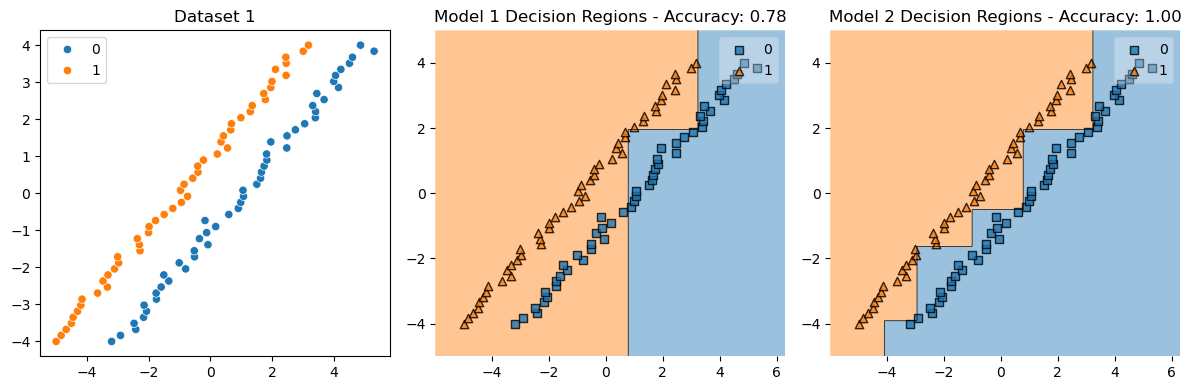

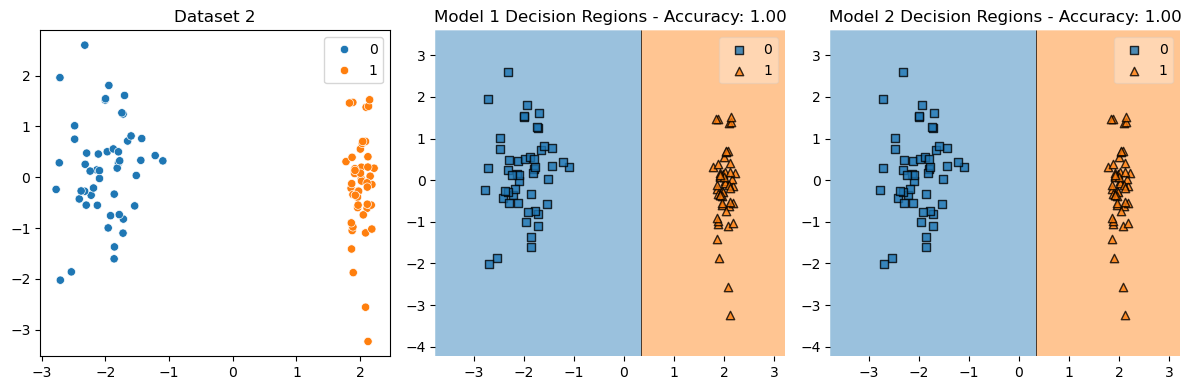

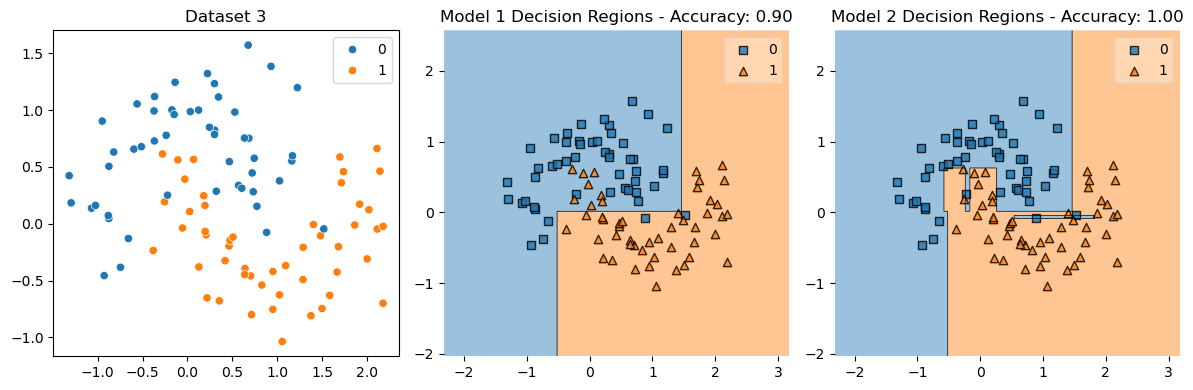

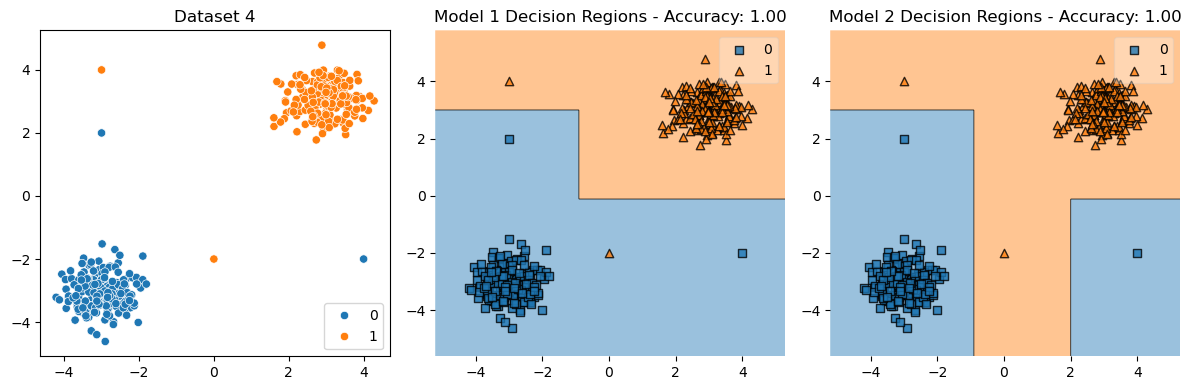

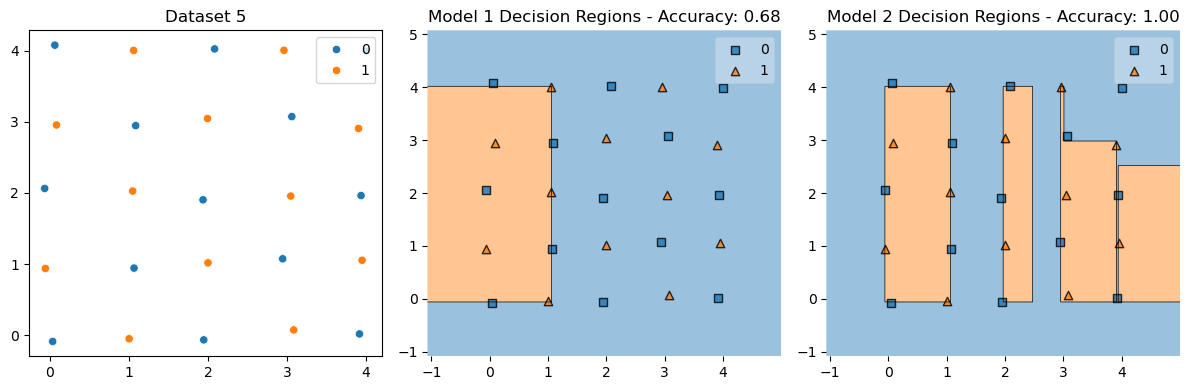

In [6]:
from sklearn.datasets import make_classification, make_blobs, make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import numpy as np


def generate_ds1():
    # Number of observations in each class
    num_obs = 50
    rng = np.random.default_rng(123)

    # Generating x1 and x2
    x1 = np.linspace(-4, 4, num_obs).reshape(-1, 1)
    x2 = np.linspace(-4, 4, num_obs).reshape(-1, 1)

    # Initial binary classification, without noise
    X = np.hstack([x1, x2])
    X = np.vstack([X, X])  # Doubling for both classes
    class_perturbation = np.hstack([1 + rng.standard_normal(num_obs) * 0.2, -1 + rng.standard_normal(num_obs) * 0.2])
    X[:, 0] += class_perturbation  # Adding noise to the x1 component
    
    # Generating labels
    y = np.hstack([np.repeat(0, num_obs), np.repeat(1, num_obs)])
    return X, y


def generate_ds2():
    X, y = make_classification(
        n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_repeated=0, 
        n_classes=2, n_clusters_per_class=1, weights=None, flip_y=0, class_sep=2.0, 
        hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=123)
    return X, y


def generate_ds3():
    X, y = make_moons(noise=0.3, random_state=0)
    return X, y


def generate_ds4():
    # Defining centers for the clusters
    centers = [(-3, -3), (3, 3)]
    cluster_std = 0.5  # Standard deviation of the clusters

    # Generating the dataset
    X, y = make_blobs(n_samples=400, centers=centers, cluster_std=cluster_std, n_features=2, random_state=123)
    y = y % 2
    
    # add additional points
    X_add = np.array([
        [-3, 4],
        [0, -2],
        [4, -2],
        [-3, 2]
    ]).reshape(-1, 2)
    y_add = np.array([1, 1, 0, 0]).reshape(-1)
    
    X = np.vstack([X, X_add])
    y = np.hstack([y, y_add])
    return X, y


def generate_ds5():
    grid_size = 5
    rng = np.random.default_rng(seed=123)
    # Create grid points
    X = [(x, y) for x in range(grid_size) for y in range(grid_size)]
    # Assign classes
    y = [(x + y) % 2 for x, y in X]
    #X = [(x - (grid_size % 2), y - (grid_size % 2)) for x, y in X]
    X = [(x + rng.uniform(-0.1, 0.1), y + rng.uniform(-0.1, 0.1)) for x, y in X]
    return np.array(X), np.array(y)


# iterating over the toy datasets
for i, (X, y) in enumerate([generate_ds1(), generate_ds2(), generate_ds3(), generate_ds4(), generate_ds5()]):
    fig, ax = plt.subplots(figsize=(12, 4), ncols=3)
    _ = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=ax[0]).set(title=f"Dataset {i + 1}")

    model1 = BinaryDecisionTreeClassifier(
        max_depth=3,
        min_information_gain_to_split=0.0,
        min_samples_in_node_for_split=3,
        p_feature_sampling=1.0,
        impurity=binary_entropy,
        random_seed=123,
    )

    model2 = BinaryDecisionTreeClassifier(
        max_depth=10,
        min_information_gain_to_split=0.0,
        min_samples_in_node_for_split=0,
        p_feature_sampling=1.0,
        impurity=binary_entropy,
        random_seed=123,
    )

    _ = model1.fit(X, y)
    _ = model2.fit(X, y)

    _ = plot_decision_regions(X, y, clf=model1, ax=ax[1])
    accuracy1 = model1.score(X, y)
    _ = ax[1].set_title(f"Model 1 Decision Regions - Accuracy: {accuracy1:.2f}")

    _ = plot_decision_regions(X, y, clf=model2, ax=ax[2])
    accuracy2 = model2.score(X, y)
    _ = ax[2].set_title(f"Model 2 Decision Regions - Accuracy: {accuracy2:.2f}")

    plt.tight_layout()

Erläutern Sie die Ergebnisse von jedem Datensatz. Argumentieren Sie klar und nachvollziehbar indem Sie auf die Grafiken verweisen.
- Diskutieren Sie kurz die Güte der Modellierung. Welches Modell (1 oder 2) gefällt ihnen besser und warum?
- Falls Unterschiede zwischen den Modellen sichtbar sind: Erklären Sie diese aufgrund der Hyperparameter und reflektieren Sie ob ihre Implementation wie erwartet funktioniert.

1. Dataset\
Hier gefällt mir das Modell 2 deutlich besser, da es die beiden Klassen genauer erkennen kann. Die Abstufungen beim ersten Modell sind sehr grob und die Klassifizierung ist nicht sehr genau. Beim zweiten Modell sind die Abstufungen feiner und die Klassifizierung ist genauer. Dies wiederspiegelt sich auch in der Accuracy. Die bessere Performance vom 2. Modell sind durch die Hyperparameter erklärbar. Das Modell hat eine grössere Tiefe, was es erlaubt, die Daten genauer zu klassifizieren.

2. Dataset\
Die beiden Modelle unterscheiden sich nicht voneinander.

3. Dataset\
Hier fällt meine Wahl auf das erste Modell. Man erkennt im Modell 2, dass aufgrund der grösseren Tiefe (`max_depth`) die Klassifizierung zwar genauer ist (die "S"-Kurve wird besser nachgebildet); allerdings ist in diesem Modell auch eine Neigung zum Overfitting vorhanden. Für einzelne Punkte werden eigene Klassifizierungen erstellt. Eine weitere Erhöhung der Tiefe würde das Overfitting noch verstärken.

4. Dataset\
Hier ist das Modell 1 besser. Das Modell 2 hat für einen einzelnen Datenpunkt, welcher als Aussreiser betrachtet werden kann, eine grosse Fläche als orange klassifiziert. Dies könnte am `min_samples_in_node_for_split` liegen, welcher auf 0 gesetzt wurde.

1. Dataset\
Da das Modell 1 eine tiefe Accuracy erreicht hat und viele orange Datenpunkte nicht korrekt klassifiziert hat, ist das Modell 2 hier besser. Es hat eine höhere Accuracy und die Klassifizierung ist genauer. Ideal ist keine der beiden Modelle: aufgrund der Grid-artigen Verteilung der Datenpunkte ist es schwierig klare Trennlinien zu finden.


Aufgrund der Grafiken und erreichten Accuracy-Werten funktioniert die Implementation wie erwartet. Die Modelle können die Daten gut klassifizieren und die Hyperparameter haben den gewünschten Effekt.

### Aufgabe 2e
Nun implementieren Sie den `BinaryRandomForestClassifier`.

In [7]:
from typing import Self
from tqdm.notebook import tqdm

from sklearn.base import ClassifierMixin, BaseEstimator


class BinaryRandomForestClassifier(BaseEstimator, ClassifierMixin):
    """Binary Random Forest Classifier
    
    Args:
    -----
        num_trees: the number of decision trees to fit
        max_depth: max depth of the decision tree, 
            if max depth is reached a leaf node is created
        min_information_gain_to_split: minimum information gain required to split a node, 
            otherwise a leaf node is created
        min_samples_in_node_for_split: minimum number of samples required to split a node,
            otherwise a leaf node is created
        p_feature_sampling: proportion of features to consider at each node (random subsample), (0, 1]
        impurity: function / callable to calculate binary impurity
        random_seed: ensure reproducibility for random operations
        verbose: bool, whether to print log messages (optional)
    """
    def __init__(
        self, 
        num_trees: int = 10,
        max_depth: int | None = None,
        min_information_gain_to_split: float = 0.0,
        min_samples_in_node_for_split: int = 2,
        p_feature_sampling: float = 1.0,
        impurity: Callable[np.ndarray, np.ndarray]=binary_entropy,
        random_seed: int=123,
        verbose: bool = False):

        self.num_trees = num_trees
        self.max_depth = max_depth
        self.min_information_gain_to_split = min_information_gain_to_split
        self.min_samples_in_node_for_split = min_samples_in_node_for_split
        self.p_feature_sampling = p_feature_sampling
        self.impurity = impurity
        self.random_seed = random_seed
        self.verbose = verbose

        self._trees = []
        self._splitter = BinarySplitOptimizer(self.impurity)
        self._rng = np.random.default_rng(random_seed)

    def fit(self, X: np.ndarray, y: np.ndarray) -> Self:
        """Fit the model

        Args:
        -----
            X: (n, k)
            y: (n, )

        Returns:
        --------
            self
        """
        self.classes_ = np.unique(y)

        for _ in range(self.num_trees):

            tree = BinaryDecisionTreeClassifier(
                max_depth=self.max_depth,
                min_information_gain_to_split=self.min_information_gain_to_split,
                min_samples_in_node_for_split=self.min_samples_in_node_for_split,
                p_feature_sampling=self.p_feature_sampling,
                random_seed=self.random_seed,  # Use random seed for each tree
            )

            X_sample, y_sample = self._sample_with_replacement(X, y)

            tree = tree.fit(X_sample, y_sample)
            self._trees.append(tree)

        return self


    def _sample_with_replacement(self, X: np.ndarray, y: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
        """Generate a random sample with replacement.

        Args:
        -----
            X: (n, k) array representing the feature matrix.
            y: (n, ) array representing the labels.

        Returns:
        --------
            (X_sample, y_sample): a tuple with the sample feature matrix and labels.
        """
        n_samples = len(y)

        sample_indices = self._rng.integers(0, n_samples, size=n_samples)

        X_sample = X[sample_indices]
        y_sample = y[sample_indices]

        return X_sample, y_sample


    def predict(self, X: np.ndarray) -> np.ndarray:
        """Return most likely class per sample

        Args:
        -----
            X: (n, k)

        Returns:
        --------
            (n, )
        """
        predictions = np.array([tree.predict(X) for tree in self._trees])

        majority_predictions = np.apply_along_axis(
            lambda x: np.bincount(x).argmax(), axis=0, arr=predictions
        )

        return majority_predictions


    def predict_proba(self, X: np.ndarray) -> np.ndarray:
        """Return probability of being the positive class per sample.

        Args:
        -----
            X: (n, k)

        Returns:
        --------
            (n, )
        """
        probabilities = np.array([tree.predict_proba(X) for tree in self._trees])

        mean_probabilities = np.mean(probabilities, axis=0)

        return mean_probabilities


    def score(self, X: np.ndarray, y: np.ndarray) -> float:
        """Calculate Accuracy

        Args:
        -----
            X: (n, k)
            y: (n, )

        Returns:
        --------
            a
        """
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)
        
        return accuracy

### Aufgabe 2f

Nun testen Sie den `BinaryRandomForestClassifier`. Verwenden Sie denselben Ansatz wie aus Aufgabe 2d. Trainieren Sie pro Datensatz jeweils zwei Modelle mit folgenden Parametern:

Verwenden Sie folgende Parameter für Modell 1:

- `num_trees=5`
- `max_depth=10`
- `min_information_gain_to_split=0.0`
- `min_samples_in_node_for_split=0`
- `p_feature_sampling=1.0`



Verwenden Sie folgende Parameter für Modell 2:

- `num_trees=30`
- `max_depth=10`
- `min_information_gain_to_split=0.0`
- `min_samples_in_node_for_split=0`
- `p_feature_sampling=1.0`

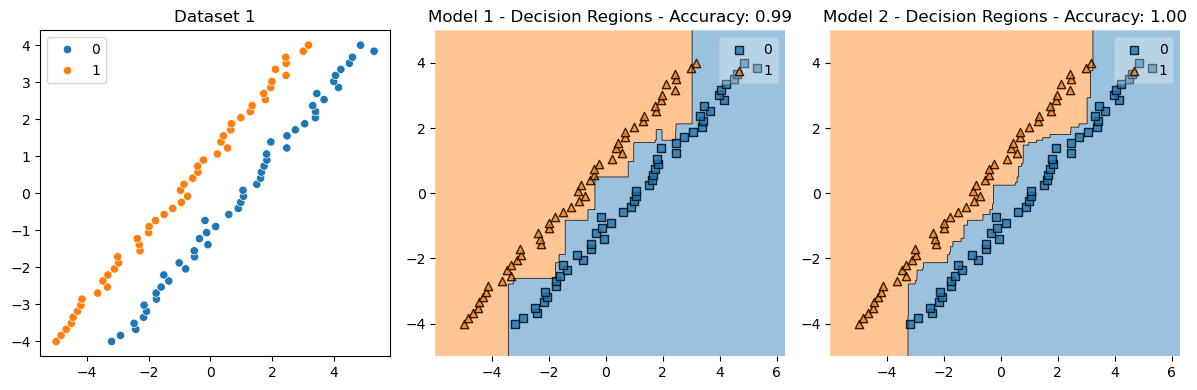

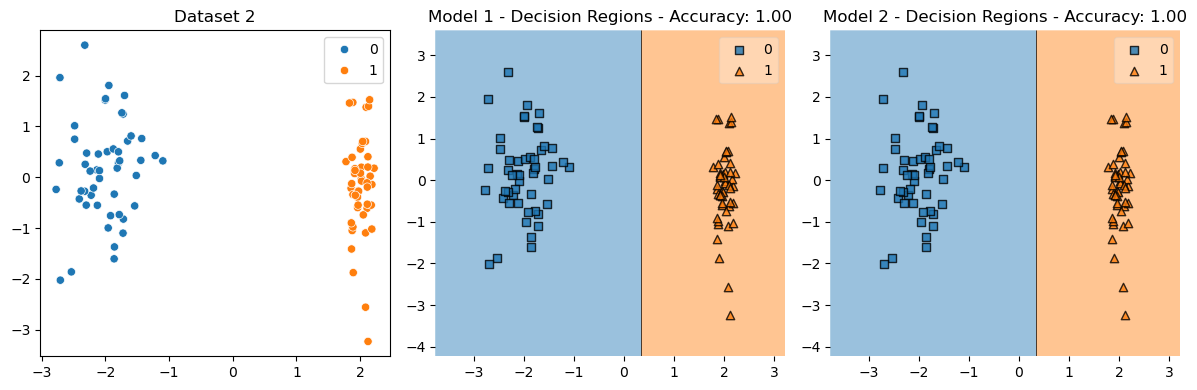

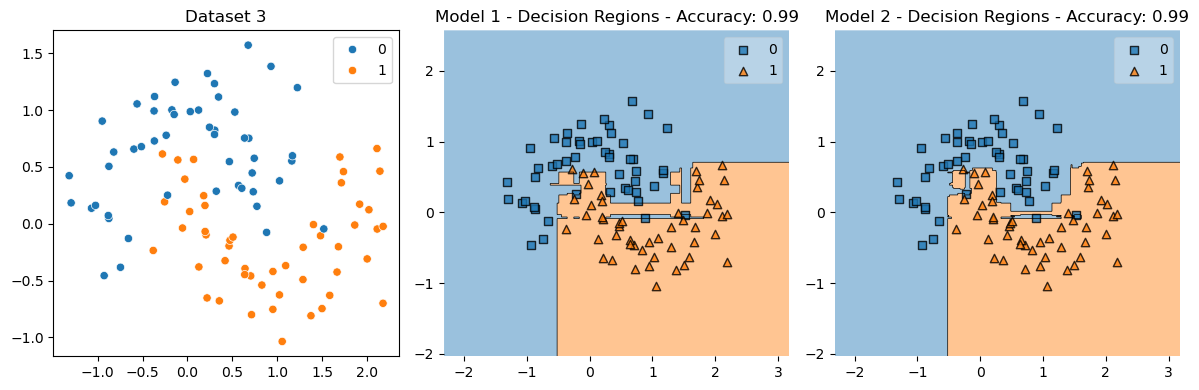

In [8]:
# iterating over the toy datasets
for i, (X, y) in enumerate([generate_ds1(), generate_ds2(), generate_ds3()]):

    fig, ax = plt.subplots(figsize=(12, 4), ncols=3)
    _ = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=ax[0]).set(title=f"Dataset {i + 1}")

    model1 = BinaryRandomForestClassifier(
        num_trees=5,
        max_depth=10,
        min_information_gain_to_split=0.0,
        min_samples_in_node_for_split=0,
        p_feature_sampling=1.0,
        random_seed=123,
    )

    model2 = BinaryRandomForestClassifier(
        num_trees=30,
        max_depth=10,
        min_information_gain_to_split=0.0,
        min_samples_in_node_for_split=0,
        p_feature_sampling=1.0,
        random_seed=123,
    )

    _ = model1.fit(X, y)
    _ = model2.fit(X, y)

    _ = plot_decision_regions(X, y, clf=model1, ax=ax[1])
    accuracy1 = model1.score(X, y)
    _ = ax[1].set_title(f"Model 1 - Decision Regions - Accuracy: {accuracy1:.2f}")

    _ = plot_decision_regions(X, y, clf=model2, ax=ax[2])
    accuracy2 = model2.score(X, y)
    _ = ax[2].set_title(f"Model 2 - Decision Regions - Accuracy: {accuracy2:.2f}")

    
    plt.tight_layout()

Erläutern Sie die Ergebnisse von jedem Datensatz. Argumentieren Sie klar und nachvollziehbar indem Sie auf die Grafiken verweisen.
- Diskutieren Sie die Güte der Modellierung. Welches Modell (1 oder 2) gefällt ihnen besser und warum?
- Falls Unterschiede zwischen den Modellen sichtbar sind: Erklären Sie diese aufgrund der Hyperparameter und reflektieren Sie ob ihre Implementation wie erwartet funktioniert.
- Erwähnen und diskutieren Sie Unterschiede zu den Tests aus 2d. Inwiefern sieht man, dass es sich hier um einen RandomForest handelt?

1. Dataset\
Hier bevorzuge ich das Modell 2. Aufgrund der höheren Anzahl Bäume im Modell 2 (`max_trees`) ist die Klassifizierung genauer; d. h. die Trennlinie zwischen den beiden Klassen ist feiner. Dies ist auch im Vergleich zu der Decision-Tree-Implementation erkennbar, die Stufen in der Trennlinie der beiden Klassen konnte durch den Random Forest deutlich reduziert werden.

2. Dataset\
Hier ist kein Unterschied zwischen den beiden Modellen sowie zum Decision-Tree sichtbar.

3. Dataset\
Hier ist kein Unterschied zwischen den beiden Modellen (Random-Forest-Implementierung) sichtbar. Mit gefällt nach wie vor das Modell 1 aus der Decision-Tree-Implementation besser, da es nicht zu Overfitting neigt. Dies überrascht mich, da ich erwartet hätte, dass der Random Forest besser generalisiert und overfitting eher vermeidet.

## Aufgabe 3 (12 Punkte)

In dieser Aufgabe modellieren Sie die Hotel-Daten und versuchen ein möglichst gutes Modell zu finden.

Hinweis: Sollte es Ihnen nicht gelungen sein die Modelle zu implementieren können Sie [sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) und [sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) verwenden.

### Aufgabe 3a

Trainieren Sie verschiedene Modelle der Klassen `BinaryRandomForestClassifier` und `BinaryDecisionTreeClassifier` auf dem Datensatz `hotel_train.csv` um `IstStorniert` vorherzusagen.

Vergleichen Sie die Modelle und finden Sie die beste Konfiguration. Verwenden Sie Kreuzvalidierung.

Berechnen Sie den Score vom besten Modell auf dem Trainings-Datensatz und auf dem Validierungs-Datensatz `hotel_validation.csv` und geben Sie diese aus.

In [10]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


train_data = pd.read_csv("hotel_train.csv")
validation_data = pd.read_csv("hotel_validation.csv")

# Remove rows with 'Nicht definiert' in 'Marktsegment'
# This is a practical choice, as this case only occurs twice in the training set
validation_data = validation_data[validation_data['Marktsegment'] != 'Nicht definiert']

categorical_cols = ['Ankunftsmonat', 'Mahlzeittyp', 'Marktsegment', 'ReservierterZimmertyp', 'Anzahlungstyp', 'Hotel']
categorical_cols_indices = [train_data.drop(columns=["IstStorniert"]).columns.get_loc(col) for col in categorical_cols]

X_train = train_data.drop(columns=["IstStorniert"]).values
y_train = train_data["IstStorniert"].values

X_validation = validation_data.drop(columns=["IstStorniert"]).values
y_validation = validation_data["IstStorniert"].values


def execute_pipeline(regressor, param_grid):

    column_transformer = ColumnTransformer(
        transformers=[
            ('onehot', OneHotEncoder(), categorical_cols_indices)
        ],
        remainder='passthrough'
    )

    model_pipeline = Pipeline(steps=[
        ('cols', column_transformer),
        ('regressor', regressor),
    ])

    cv = KFold(n_splits=5, shuffle=True, random_state=123)
    grid_search = GridSearchCV(
        estimator=model_pipeline,
        param_grid=param_grid,
        scoring="accuracy",
        cv=cv,
        n_jobs=-1
    )

    _ = grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_

    print("Best Score from GridSearchCV:", grid_search.best_score_)
    print("Best Parameters from GridSearchCV:", grid_search.best_params_)


    _ = best_model.fit(X_train, y_train)

    train_score = accuracy_score(y_train, best_model.predict(X_train))
    validation_score = accuracy_score(y_validation, best_model.predict(X_validation))

    print("Training Score of Best Model:", train_score)
    print("Validation Score of Best Model:", validation_score)

    return best_model #.named_steps['regressor']


# print("BinaryRandomForestClassifier:\n")
# _ = execute_pipeline(BinaryRandomForestClassifier(), {
#     'regressor__max_depth': [10],
#     'regressor__num_trees': [10],
#     'regressor__p_feature_sampling': [1.0]
# })

print("DecisionTreeClassifier:\n")
_ = execute_pipeline(DecisionTreeClassifier(), {
    'regressor__max_depth': [6, 8, 10, 20, 25, 50],
    'regressor__min_samples_leaf': [5, 10, 50],
    'regressor__min_samples_split': [2, 5],
    'regressor__max_features': [None, 'sqrt', 'log2'],
})

print("\n\nRandomForestClassifier:\n")
forest_classifier = execute_pipeline(RandomForestClassifier(), {
    'regressor__n_estimators': [10, 50, 100],
    'regressor__max_depth': [6, 8, 10, 50],
    'regressor__min_samples_leaf': [5, 10, 50],
    'regressor__min_samples_split': [2, 5],
    'regressor__max_features': [None, 'sqrt', 'log2'],
})


DecisionTreeClassifier:

Best Score from GridSearchCV: 0.8161603428715493
Best Parameters from GridSearchCV: {'regressor__max_depth': 20, 'regressor__max_features': None, 'regressor__min_samples_leaf': 10, 'regressor__min_samples_split': 2}
Training Score of Best Model: 0.8604815328375142
Validation Score of Best Model: 0.8204830820432656


RandomForestClassifier:

Best Score from GridSearchCV: 0.840287407033909
Best Parameters from GridSearchCV: {'regressor__max_depth': 50, 'regressor__max_features': None, 'regressor__min_samples_leaf': 5, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}
Training Score of Best Model: 0.9124669103743854
Validation Score of Best Model: 0.8389390348444354


### Aufgabe 3b

Interpretieren Sie das Ergebnis:

- Welche Modell-Varianten haben Sie verglichen? Begründen Sie kurz warum Sie welche Parameter wie variiert haben.
- Vergleichen und interpretieren Sie Scores auf Trainings- und Validation-Datensatz.

#### Modell-Varianten

Ich habe meine Implementation vom Random-Forest (`BinaryRandomForestClassifier`) mit der Implementation von `sklearn.ensemble.RandomForestClassifier` sowie `sklearn.tree.DecisionTreeClassifier` verglichen. Ich habe mich aufgrund de längeren Laufzeit meiner eigenen Implementation schliesslich dazu entschieden, die Implementation von `sklearn` zu verwenden (Laufzeitbeschränkung des Notebooks). Allerdings habe ich mit meiner eignene Implementation ebenfalls einen Score von $0.81$ auf dem Validierung-Datensatz erreicht.\
Folgende Parameter habe ich variiert:
- `n_estimators` / `num_trees` (nur Forest)\
Folgende Werte habe ich getestet: $10$, $50$, $100$. Die Anzahl Bäume hat einen grossen Einfluss auf die Performance des Modells. Mit einer höheren Anzahl Bäume wird das Modell genauer, allerdings steigt auch die Laufzeit. Mit der Verwendung vom `sklearn`-Forest können aber auch $100$ Bäume in einer angemessenen Zeit trainiert werden. Dieser Wert hat auch den besten Output geliefert.
- `max_depth`\
Folgende Werte habe ich getestet: $6$, $8$, $10$, $50$ 
- `min_samples_leaf` / `min_information_gain_to_split`\
Folgende Werte habe ich getestet: $5$, $10$, $50$
- `min_samples_split` / `min_samples_in_node_for_split`\
Folgende Werte habe ich getestet: $2$, $5$
- `max_features` / `p_feature_sampling`\
Folgende Werte habe ich getestet: `None`, $sqrt$, $log_2$ (für `sklearn`), $1.0$ (für meine Implementation)



#### Vergleich der Scores auf Trainings- und Validierung-Datensatz:

| Modell                                    | Trainingsdatensatz | Validierung-Datensatz |
|-------------------------------------------|--------------------|-----------------------|
| `sklearn.tree.DecisionTreeClassifier`     | $0.86$             |                $0.82$ |
| `sklearn.ensemble.RandomForestClassifier` | $0.91$             |                $0.84$ |
| `BinaryRandomForestClassifier`            | $0.81$             |                $0.81$ |

Logischerweise ist der Score auf dem Trainingsdatensatz höher als auf dem Validierung-Datensatz. Das Modell von `sklearn` hat auf beiden Datensätzen den höchsten Score erreicht. Die Scores sind jedoch sehr ähnlich, was darauf hindeutet, dass das Modell gut generalisiert (also das Modell ist nicht nur gut an die Trainingsdaten angeglichen, sondern auch an die Validationsdaten). Der `RandomForestClassifier` von `sklearn` hat aufgrund der höheren Anzahl Bäume und der dadurch besseren Generalisierung den besten Score erreicht.

### Aufgabe 3c

Beantworten Sie folgende Fragen:

- Mika fragt Sie ob es hilfreich wäre mehr Trainingsdaten zu sammeln (was viel Zeit und Geld kosten würde). Kann man diese Frage beantworten? Falls ja, wie würden Sie vorgehen?
- Mika muss eine Präsentation für das Hotel-Management vorbereiten und die Ergebnisse, sowie Empfehlungen vorstellen. Mika bittet Sie um Rat. Wie könnte das Management dieses Modell nun gewinnbringend einsetzen?

Ich denke, dass die Anzahl Datensätze reicht. Um das Modell über mehrere Hotels zu generalisieren, wären aber natürlich Daten von mehr als einem Hotel nötig. Es wäre aber durchaus hilfreich, mehr Variablen zu sammeln, da die vorhandenen Variablen nur eine geringe Korrelation mit der Zielvariable aufweisen.

Da das Modell mit ca. 85 % Genauigkeit eine Stornierung vorhersagen kann, ist es durchaus verwendbar. Das Management könnte durch diese Vorhersage besser planen und die Auslastung des Hotels optimieren. So könnte z. B. eine Schätzung abgegeben werden, wie viele Hotelzimmer für einen bestimmten Tag durch Stornierungen wieder frei werden. So hat man dann auch die Möglichkeit, Werbung zu schalten oder die Preise für diesen Zeitraum zu senken. Natürlich könnte man die Zimmer auch überbuchen, wenn das Modell viele Stornierungen vorhersagt. Dies birgt aber auch das Risiko, dass Gästen abgesagt werden muss, was die Reputation des Hotels schädigen könnte.

## Aufgabe 4 (Bonusaufgabe, 5 Punkte) Competition

In dieser Aufgabe geht es darum auf einem Testset Vorhersagen zu generieren die möglichst akkurat sind. Sie dürfen dazu das Modell aus Aufgabe 3 verwenden oder ein komplett neues Modell erstellen. Sie dürfen dabei alle Methoden aus `sklearn` verwenden (auch andere Modelle und Algorithmen).

Sie müssen die Vorhersagen abspeichern und mit dem finalen Commit abgeben. 

Ihre Vorhersagen werden dann beurteilt und mit denjenigen Ihrer Kolleginnen und Kollegen verglichen.

Die besten kriegen die Bonuspunke.

Beachten Sie die maximale Laufzeit vom Notebook von 30 Minuten.

### Aufgabe 4a

Lesen Sie das File `hotel_test.csv` ein und generieren Sie die Vorhersagen.  Speichern Sie diese in das File `hotel_test_predictions.csv`. 

Definieren Sie im Code die Variable `my_leaderboard_name`. Dies ist Ihr Pseudonym für die öffentliche Anzeige von ihrem Score.

In [14]:
import pandas as pd
import numpy as np

from pathlib import Path

my_leaderboard_name = 'seyaschmassmann'

df_test = pd.read_csv("hotel_test.csv")
df_test['Marktsegment'] = df_test['Marktsegment'].replace('Nicht definiert', 'Gruppen')

y_hat = forest_classifier.predict(df_test.values)

fname_predictions = "hotel_test_predictions.csv"
#y_hat = np.array([0 for _ in range(df_test.shape[0])]).reshape(-1)
df_test_predictions = pd.DataFrame({"IstStorniert": y_hat})                                             
df_test_predictions.to_csv(fname_predictions, index=False)

Der folgende Code soll / kann nicht verändert werden. Dieser liest ihre Vorhersagen ein, evaluiert diese, und schreibt das Resultat in ein File.

In [ ]:
# ensure that `hotel_test_predictions.csv` exists!
if Path(fname_predictions).exists():
    has_test_predictions = True
    print(f"Reading Predictions from {fname_predictions}")
    df_test_predictions = pd.read_csv(fname_predictions, index_col=False)
    y_hat = df_test_predictions[["IstStorniert"]].to_numpy().reshape(-1)
else:
    has_test_predictions = False
    print(f"File {fname_predictions} not found")

# reads the y_true for the test dataset (not available to you!)
path_df_test_solutions = "/home/jovyan/work/data/hotel_bookings/hotel_test_solution.csv"

if Path(path_df_test_solutions).exists() & has_test_predictions:
    print(f"File {path_df_test_solutions} found")
    df_test_true = pd.read_csv(path_df_test_solutions, index_col=False)
    y_true = df_test_true[["IstStorniert"]].to_numpy().reshape(-1)
    print(f"Test Accuracy: {accuracy_score(y_true, y_hat)}")

    with open("test_accuracy.txt", "w") as f:
        _ = f.write(f"{accuracy_score(y_true, y_hat):.5f},{my_leaderboard_name}")
else:
    print(f"File {path_df_test_solutions} not found")